<a href="https://colab.research.google.com/github/xThomasE/ProyectoFinal/blob/main/FinalProgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#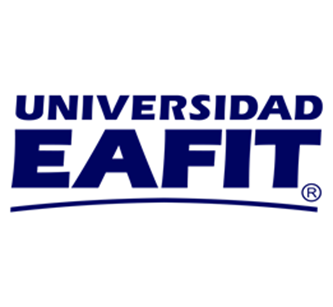

#TRABAJO ANÁLISIS DE DATOS
##Análisis del precio de bienes inmuebles en la Florida.


### Realizado por:
- Johann Ruiz Montalvo
- Thomas Escobar Marin
- Juan Pablo Gómez Álvarez




##1) IMPORT LIBRARIES

In [342]:
import numpy as np
import pandas as pd
import patsy as pt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import itertools
from IPython.display import display, HTML
from sklearn import linear_model
from sklearn.model_selection import KFold
from ipywidgets import interact
import ipywidgets as widgets
import warnings
import copy
warnings.filterwarnings('ignore')

In [343]:
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import graphviz

In [344]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [345]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [346]:
#pip install graphviz

In [347]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
import pickle

%matplotlib inline
plt.style.use('seaborn-white')

In [348]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

## 2) UPLOAD DATA

In [349]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HousingCharacteristics.xlsx to HousingCharacteristics (2).xlsx
User uploaded file "HousingCharacteristics.xlsx" with length 278886 bytes


In [350]:
data = pd.read_excel("HousingCharacteristics.xlsx", sheet_name = "BaseF")

##3) DATA DESCRIPTION

In [351]:
data.head()

,Variable,Total_housing_units,Median_rooms,Median_Price_dollars,Total_population,Median_age_years,Citizen_18_and_over_population,Vacant_housing_units,Owner-occupied,Renter-occupied,...,Total_households,Median_household_income_dollars,Mean_household_income_dollars,Median_family_income_dollars,Mean_family_income_dollars,Per_capita_income_dollars,Nonfamily_households,Median_nonfamily_income_dollars,Mean_nonfamily_income_dollars,Median_earnings_for_workers_dollars
0,Alachua,125518,5.3,245300,279238,32.8,216625,17329,61131,47058,...,108189,56445,86187,86547,116736,35001,51054,33100,50263,31278
1,Bay,106144,4.9,243200,179168,41.1,135381,26612,50383,29149,...,79532,60557,78433,70172,88914,33654,26896,46693,53791,35833
2,Brevard,294237,5.6,269500,616628,47.0,486055,39923,195481,58833,...,254314,65333,89370,79906,107670,38066,93653,39129,52860,36656
3,Broward,864468,4.6,346100,1930983,41.3,1297147,116753,473136,274579,...,747715,65747,92881,78917,109044,36754,274786,42046,60635,37453
4,Charlotte,113469,5.1,267900,194843,60.4,163761,24481,73636,15352,...,88988,59285,76367,68895,87895,35270,30330,35517,49812,31339


In [352]:
data.describe()

,Total_housing_units,Median_rooms,Median_Price_dollars,Total_population,Median_age_years,Citizen_18_and_over_population,Vacant_housing_units,Owner-occupied,Renter-occupied,Moved_in_2019_or_later,...,Total_households,Median_household_income_dollars,Mean_household_income_dollars,Median_family_income_dollars,Mean_family_income_dollars,Per_capita_income_dollars,Nonfamily_households,Median_nonfamily_income_dollars,Mean_nonfamily_income_dollars,Median_earnings_for_workers_dollars
count,4.100000e+01,41.000000,41.000000,4.100000e+01,41.000000,4.100000e+01,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,2.383265e+05,5.358537,288487.804878,4.815684e+05,45.758537,3.502231e+05,34976.243902,136554.292683,66795.951220,63054.317073,...,203350.243902,63098.146341,88117.341463,77425.585366,103109.365854,36774.682927,72743.243902,39991.512195,56197.853659,35604.414634
std,2.398664e+05,0.452203,88037.614674,5.736837e+05,7.742738,3.797491e+05,33482.826453,124378.094503,90595.004236,67251.547913,...,210901.278229,9739.161949,16588.681666,11337.671428,20449.259308,7468.825448,75700.954902,6655.831891,11145.479340,3874.273770
min,3.002800e+04,4.000000,114200.000000,8.217000e+03,32.000000,1.272200e+04,2483.000000,19617.000000,7500.000000,6607.000000,...,27545.000000,33370.000000,48904.000000,45070.000000,58049.000000,21147.000000,9223.000000,23996.000000,32825.000000,26996.000000
25%,8.283700e+04,5.100000,245300.000000,1.356380e+05,39.900000,9.762300e+04,12295.000000,55920.000000,14301.000000,18434.000000,...,69974.000000,58380.000000,76367.000000,70165.000000,88706.000000,32491.000000,26337.000000,35517.000000,49572.000000,32682.000000
50%,1.477320e+05,5.400000,280100.000000,2.792380e+05,45.400000,2.210730e+05,24395.000000,87322.000000,34811.000000,41474.000000,...,126980.000000,62618.000000,86187.000000,78917.000000,101476.000000,35001.000000,47233.000000,39744.000000,55691.000000,35619.000000
75%,2.772810e+05,5.600000,323200.000000,5.644120e+05,49.500000,4.397140e+05,39923.000000,178724.000000,61773.000000,68437.000000,...,243344.000000,68172.000000,93217.000000,85256.000000,111266.000000,39547.000000,89188.000000,44434.000000,62605.000000,37453.000000
max,1.084304e+06,6.300000,661400.000000,2.662777e+06,68.400000,1.645824e+06,120827.000000,505982.000000,457495.000000,292001.000000,...,963477.000000,91602.000000,129104.000000,110092.000000,148146.000000,52622.000000,311368.000000,52081.000000,86489.000000,47256.000000


In [353]:
población_mayor = data["Median_Price_dollars"].idxmax()
fila_población_mayor = data.loc[población_mayor]
df_pM = pd.DataFrame(fila_población_mayor)
sol_pM = df_pM.T
sol_pM

,Variable,Total_housing_units,Median_rooms,Median_Price_dollars,Total_population,Median_age_years,Citizen_18_and_over_population,Vacant_housing_units,Owner-occupied,Renter-occupied,...,Total_households,Median_household_income_dollars,Mean_household_income_dollars,Median_family_income_dollars,Mean_family_income_dollars,Per_capita_income_dollars,Nonfamily_households,Median_nonfamily_income_dollars,Mean_nonfamily_income_dollars,Median_earnings_for_workers_dollars
23,Monroe,54416,4.0,661400,8217,48.2,64499,18338,21777,14301,...,36078,68563,115417,86593,148146,52415,15087,51868,65791,37499


Encontramos entonces que la localidad con los precios mas caros es Monroe.

In [354]:
población_menor = data["Median_Price_dollars"].idxmin()
fila_población_menor = data.loc[población_menor]
df_pm = pd.DataFrame(fila_población_menor)
sol_pm = df_pm.T
sol_pm

,Variable,Total_housing_units,Median_rooms,Median_Price_dollars,Total_population,Median_age_years,Citizen_18_and_over_population,Vacant_housing_units,Owner-occupied,Renter-occupied,...,Total_households,Median_household_income_dollars,Mean_household_income_dollars,Median_family_income_dollars,Mean_family_income_dollars,Per_capita_income_dollars,Nonfamily_households,Median_nonfamily_income_dollars,Mean_nonfamily_income_dollars,Median_earnings_for_workers_dollars
32,Putnam,36213,5.6,114200,74167,45.9,56031,6448,21347,8418,...,29765,33370,48904,45070,58049,21147,12245,23996,32825,26996


Encontramos entonces que la localidad con el precio menor es Putnam.

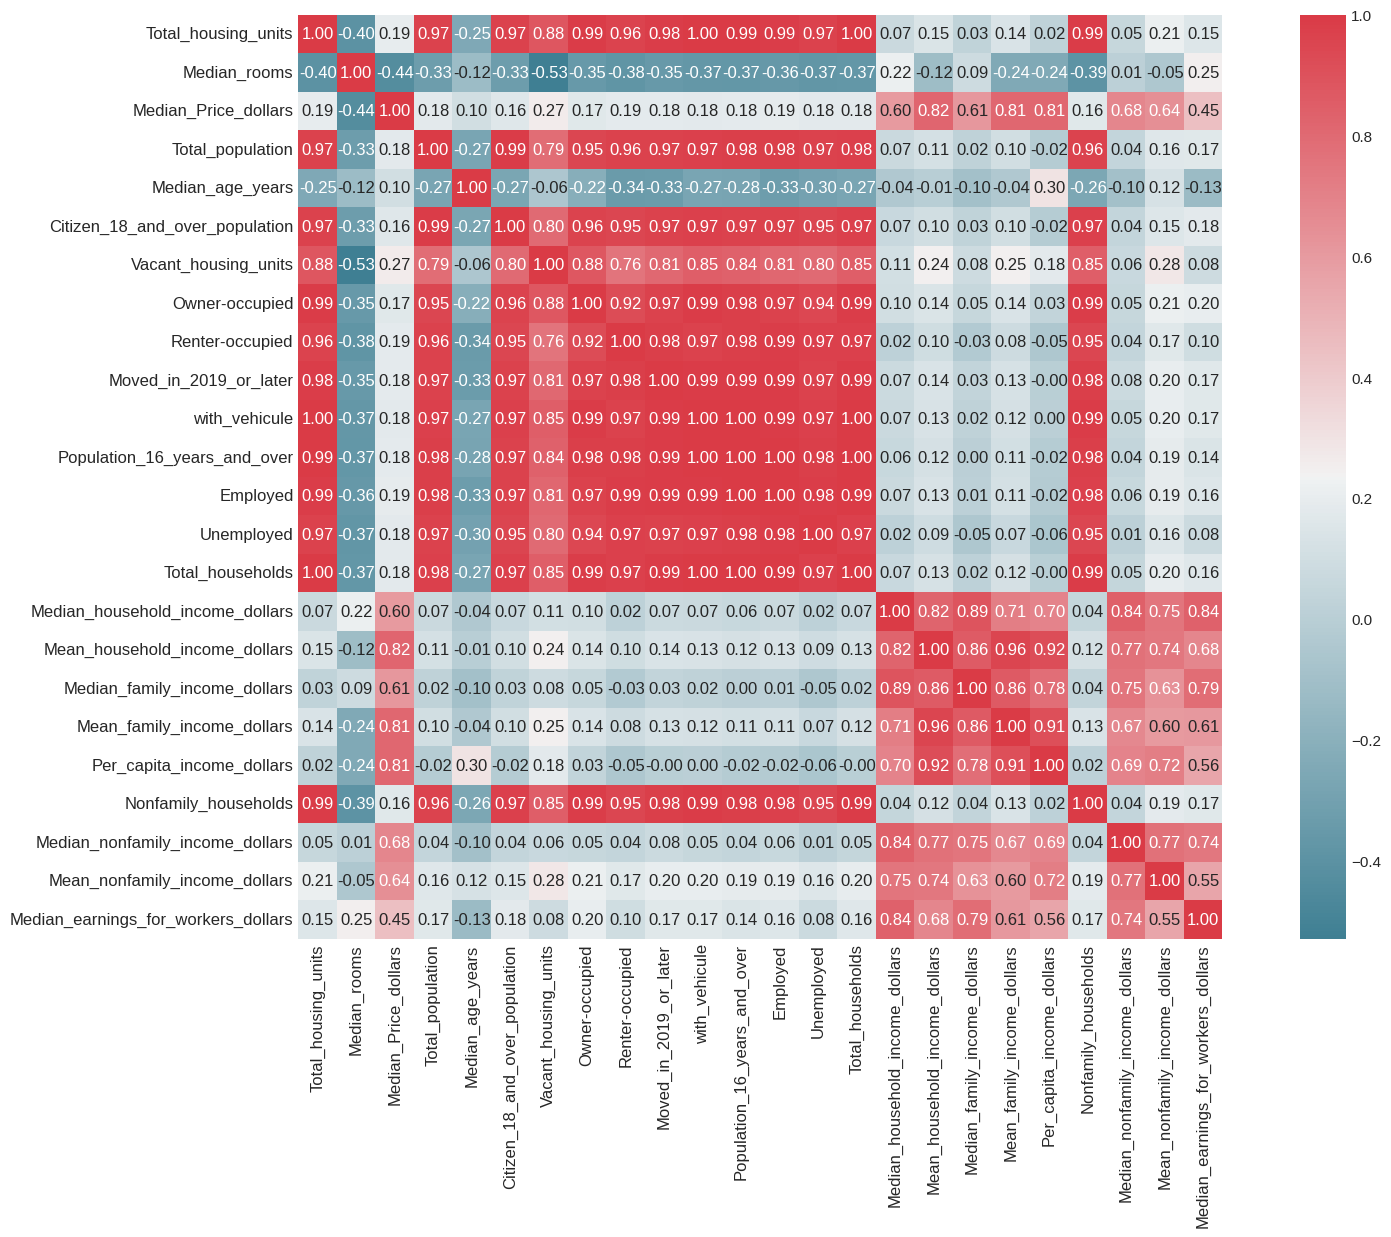

In [355]:
corr_matrix = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", square=True, ax=ax)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Acá encontramos la correlación entre las variables para saber cuales tienen mayor peso en la investigación y conocer cuales depurar o no.

In [356]:
corr_matrix["Median_Price_dollars"]

Total_housing_units                    0.194436
Median_rooms                          -0.436012
Median_Price_dollars                   1.000000
Total_population                       0.176460
Median_age_years                       0.098461
Citizen_18_and_over_population         0.162205
Vacant_housing_units                   0.265136
Owner-occupied                         0.168822
Renter-occupied                        0.185036
Moved_in_2019_or_later                 0.182836
with_vehicule                          0.178109
Population_16_years_and_over           0.182912
Employed                               0.192162
Unemployed                             0.178108
Total_households                       0.179046
Median_household_income_dollars        0.602206
Mean_household_income_dollars          0.816946
Median_family_income_dollars           0.613187
Mean_family_income_dollars             0.812291
Per_capita_income_dollars              0.812303
Nonfamily_households                   0

La variable "Median price dollars" tiene una correlación positiva significativa con "Mean household income dollars" de 0.816946, por lo que tiene una relación positiva y fuerte entre estas dos variables. Es decir, a medida que "Mean household income dollars" aumentan, el "Median price dollars" también aumenatará.

La variable "Median price dollars" tiene una correlación negativa significativa con "Median rooms" de -0.436012, lo que significa que hay una relación negativa moderada entre estas dos variables. En otras palabras, a medida que "Median rooms" aumentan, el "Median price dollars" tiende a disminuir.

##4) MODIFIE DATA

In [357]:
data.isnull().sum()

Variable                               0
Total_housing_units                    0
Median_rooms                           0
Median_Price_dollars                   0
Total_population                       0
Median_age_years                       0
Citizen_18_and_over_population         0
Vacant_housing_units                   0
Owner-occupied                         0
Renter-occupied                        0
Moved_in_2019_or_later                 0
with_vehicule                          0
Population_16_years_and_over           0
Employed                               0
Unemployed                             0
Total_households                       0
Median_household_income_dollars        0
Mean_household_income_dollars          0
Median_family_income_dollars           0
Mean_family_income_dollars             0
Per_capita_income_dollars              0
Nonfamily_households                   0
Median_nonfamily_income_dollars        0
Mean_nonfamily_income_dollars          0
Median_earnings_

In [358]:
def scale(df):
    return (df-df.mean())/(df.std())


In [359]:
X = data.drop(data[['Median_Price_dollars', "Median_nonfamily_income_dollars", "Median_earnings_for_workers_dollars", "Per_capita_income_dollars", "Mean_family_income_dollars", 'Median_family_income_dollars', \
                    'Mean_household_income_dollars', 'Median_household_income_dollars', 'Variable', 'with_vehicule']], axis=1)
y = data['Median_Price_dollars']
y = scale(y)
X = scale(X)

## 5) MULTIPLE REGRESSION ANALYSIS

In [360]:
form = "Median_Price_dollars ~ Total_housing_units + Median_rooms + Median_age_years + Citizen_18_and_over_population + Employed + Mean_family_income_dollars + Nonfamily_households + Mean_nonfamily_income_dollars"
results = smf.ols(form ,data).fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Median_Price_dollars   R-squared:                       0.852
Model:                              OLS   Adj. R-squared:                  0.815
Method:                   Least Squares   F-statistic:                     23.01
Date:                  Wed, 31 May 2023   Prob (F-statistic):           3.30e-11
Time:                          04:58:46   Log-Likelihood:                -485.32
No. Observations:                    41   AIC:                             988.6
Df Residuals:                        32   BIC:                             1004.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Es importante resaltar antes de dar un análisis respecto a la última regresión múltiple que decidimos hacer un filtro de las variables poco significativas para nuestro modelo, el criterio para sacar dichas variables del modelo fue a partir del p-value, ya que si el p-value de una variable es mayor a 0.05, indica que la variable no es significativa en la predicción del resultado y que no es necesario incluirla en el modelo.

Se evidencia que variables como "median_rooms" indica que, manteniendo constante el efecto de las demás variables predictoras, un aumento unitario en dicha variable, se relaciona con una disminución de -6.691e+04 unidades en "Median Price Dollars". ariables como "median_rooms" indica que, manteniendo constante el efecto de las demás variables predictoras, un aumento unitario en dicha variable, se relaciona con una disminución de -6.691e+04 unidades en "Median Price Dollars". La variable "median_age_years" indica que, manteniendo constante el efecto de las demás variables predictoras, un aumento unitario en dicha variable, se relaciona con un aumento de 1701.9526 unidades en "Median Price Dollars". La variable "Employed" indica que, manteniendo constante el efecto de las demás variables predictoras, un aumento unitario en dicha variable, se relaciona con un aumento de 0.4649 unidades en "Median Price Dollars". La variable "mean_family_income_dollars" indica que, manteniendo constante el efecto de las demás variables predictoras, un aumento unitario en dicha variable, se relaciona con un aumento de 2.7036 unidades en "Median Price Dollars". La variable "nonfamily_households" indica que, manteniendo constante el efecto de las demás variables predictoras, un aumento unitario en dicha variable, se relaciona con una disminución de -1.1350 unidades en "Median Price Dollars".

Nuestro modelo de regresión múltiple cuenta con un coeficiente R cuadrado ajustado de 0.815 lo que indica que el modelo explica el 81.5% de la variabilidad de los datos de la variable "Median price dollars", teniendo en cuenta el número de variables predictoras en el modelo. Esto significa que el modelo ajustado es capaz de predecir el 81.5% de la variabilidad de los datos de la variable dependiente es utilizando las variables independientes o predictoras.

## 6) DECISION TREE

In [361]:
def trees_cv(X, y, λ, k):
    """Perform the Regressor Decision Tree with 
    k-fold cross validation to return mean MSE scores for each fold"""
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        model =  DecisionTreeRegressor(random_state = 0, max_depth=λ).fit(X_train, y_train)
        
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs

In [362]:
def mse(y_hat, y):
    """Calculate Mean Squared Error"""
    return np.sum(np.square(y_hat - y)) / y.size

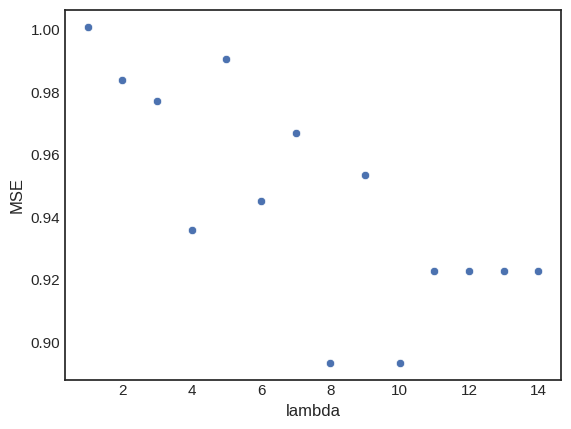

In [363]:
lambdas = np.arange(1, 15, 1)
MSEs = [] 
for l in lambdas:
    MSEs += [np.mean(trees_cv(X, y, λ=l, k=10))]

sns.scatterplot(x='lambda', y='MSE', data=pd.DataFrame({'lambda': lambdas, 'MSE': MSEs}));

In [364]:
min(zip(MSEs, lambdas))

(0.8933823242872521, 10)

In [365]:
forecast = DecisionTreeRegressor(random_state = 0, max_depth=10).fit(X, y)

In [366]:
forecast.score(X, y)

0.9999416175858538

<Axes: >

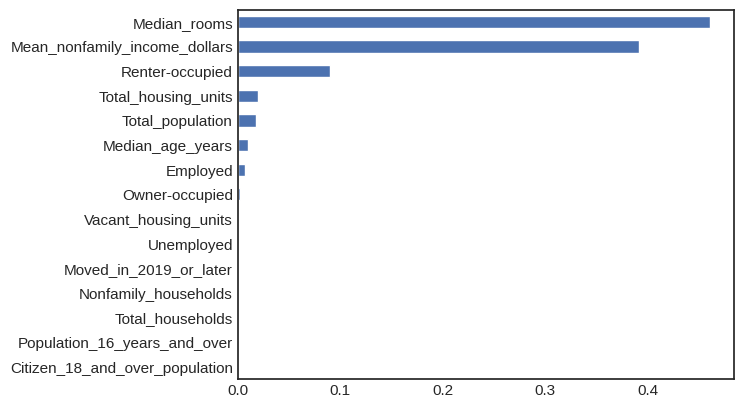

In [367]:
pd.Series(forecast.feature_importances_, name = 'Feature importance', index = X.columns).sort_values().plot.barh()

In [368]:
tuning_param = 'max_depth'
columns = [tuning_param, 'MSE']

results = []
for m in np.arange(2, 40):
    mse_scores = trees_cv(X, y, m, 4)
    results += [[m, np.mean(mse_scores)]]

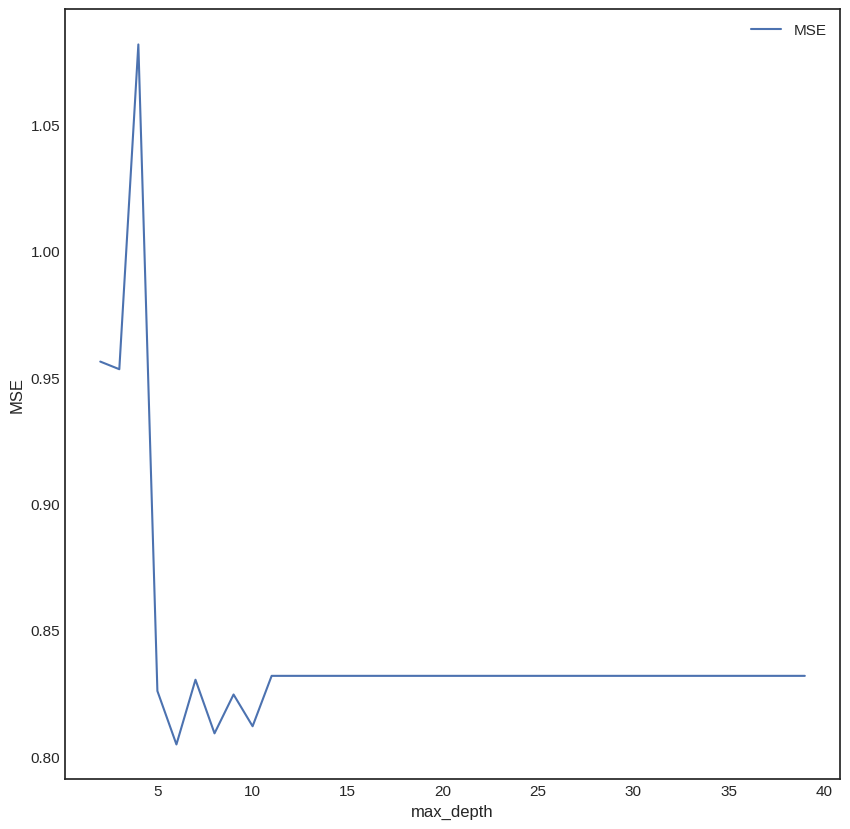

In [369]:
plot_df = pd.DataFrame(np.asarray(results), columns=columns).set_index(tuning_param)
plt.figure(figsize=(10,10))
sns.lineplot(data=plot_df)
plt.ylabel('MSE');

##7) XG BOOST

In [370]:
def trees_cvBoost(X, y, λ, k):
    """Perform the Regressor Decision Tree with 
    k-fold cross validation to return mean MSE scores for each fold"""
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        xgb_model = XGBRegressor(random_state=0, max_depth= λ).fit(X_train, y_train)
        
        y_hat = xgb_model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs

In [371]:
def mse(y_hat, y):
    """Calculate Mean Squared Error"""
    return np.sum(np.square(y_hat - y)) / y.size

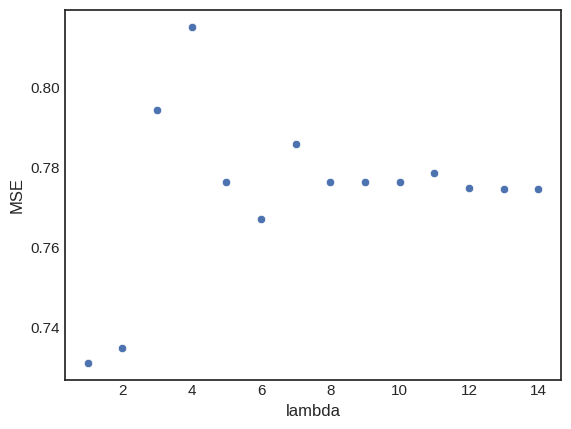

In [372]:
lambdas = np.arange(1, 15, 1)
MSEs = [] 
for l in lambdas:
    MSEs += [np.mean(trees_cvBoost(X, y, λ=l, k=10))]

sns.scatterplot(x='lambda', y='MSE', data=pd.DataFrame({'lambda': lambdas, 'MSE': MSEs}));

In [373]:
min(zip(MSEs, lambdas))

(0.7310511382030674, 1)

In [374]:
tuning_param = 'max_depth'
columns = [tuning_param, 'MSE']

results = []
for m in np.arange(2, 40):
    mse_scores = trees_cvBoost(X, y, m, 4)
    results += [[m, np.mean(mse_scores)]]

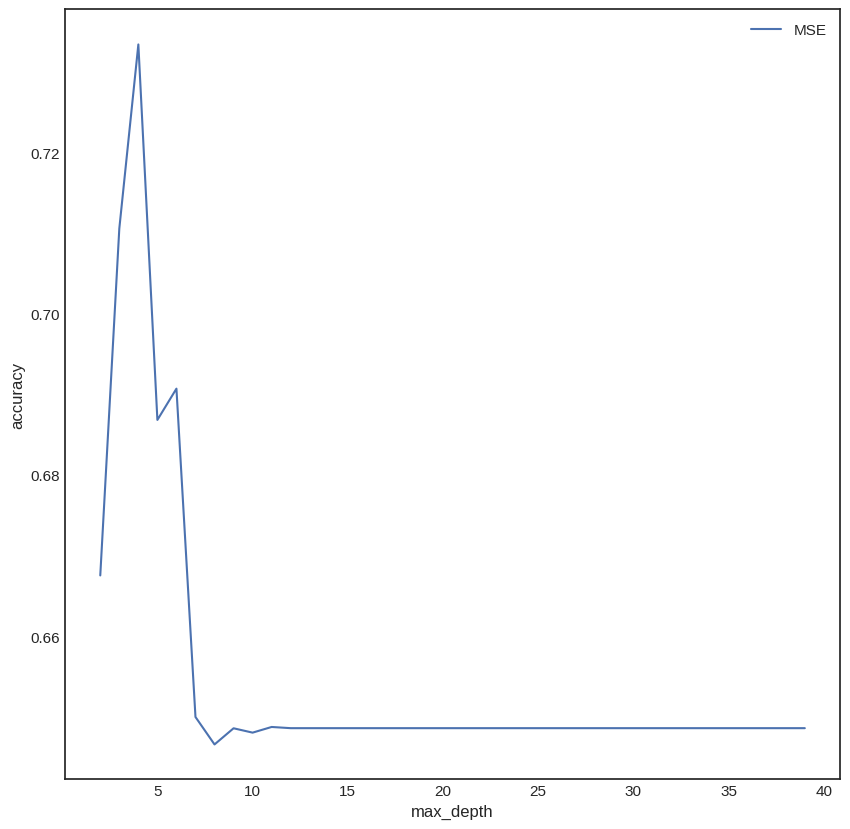

In [375]:
plot_df = pd.DataFrame(np.asarray(results), columns=columns).set_index(tuning_param)
plt.figure(figsize=(10,10))
sns.lineplot(data=plot_df)
plt.ylabel('accuracy');

In [376]:
forecastXG = XGBRegressor(random_state=0, max_depth = 1).fit(X, y)

In [377]:
forecastXG.score(X, y)

0.9697888687486172

<Axes: >

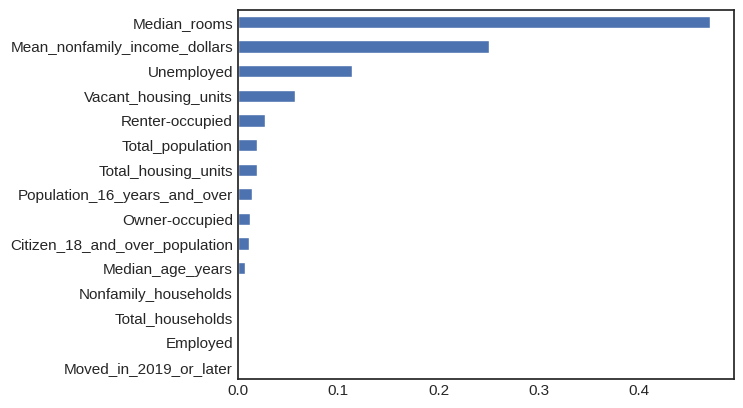

In [378]:
pd.Series(forecastXG.feature_importances_, name = 'Feature importance', index = X.columns).sort_values().plot.barh()

##8) RANDOM FOREST

In [379]:
def RF_cv(X, y, λ, k):
    """Perform the RF with 
    k-fold cross validation to return mean MSE scores for each fold"""
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        model = RandomForestRegressor(n_estimators = 10, max_depth = λ).fit(X_train, y_train)
        
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs

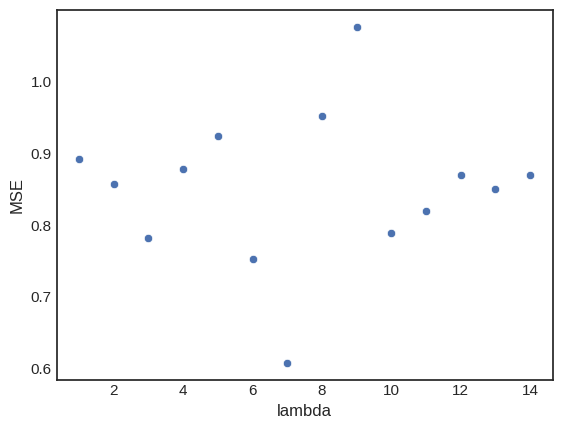

In [380]:
lambdas = np.arange(1, 15, 1)
MSEs = [] 
for l in lambdas:
    MSEs += [np.mean(RF_cv(X, y, λ=l, k=10))]

sns.scatterplot(x='lambda', y='MSE', data=pd.DataFrame({'lambda': lambdas, 'MSE': MSEs}));

In [381]:
min(zip(MSEs, lambdas))

(0.6082795835404886, 7)

In [382]:
forecastR = RandomForestRegressor(random_state = 0, max_depth=14).fit(X, y)

In [383]:
forecastR.score(X, y)

0.8955970750488395

<Axes: >

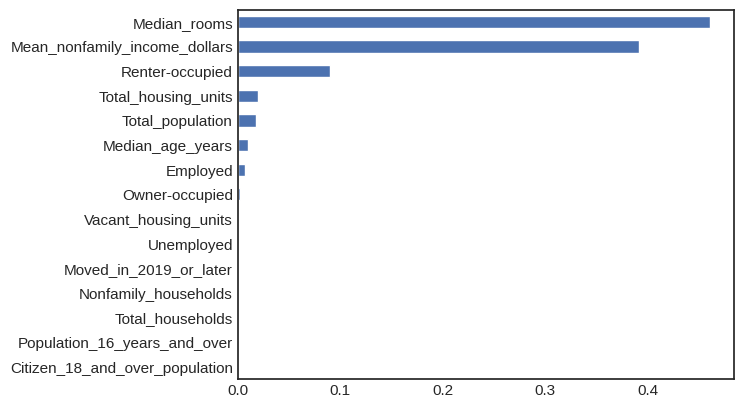

In [384]:
pd.Series(forecast.feature_importances_, name = 'Feature importance', index = X.columns).sort_values().plot.barh()

##9) RIDGE 

In [385]:
def ridge_cv(X, y, λ, k):
    """Perform ridge regresion with 
    k-fold cross validation to return mean MSE scores for each fold"""
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        model = linear_model.Ridge(alpha=λ, fit_intercept=False, solver='cholesky').fit(X_train, y_train)

        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs


In [386]:
def mse(y_hat, y):
    """Calculate Mean Squared Error"""
    return np.sum(np.square(y_hat - y)) / y.size

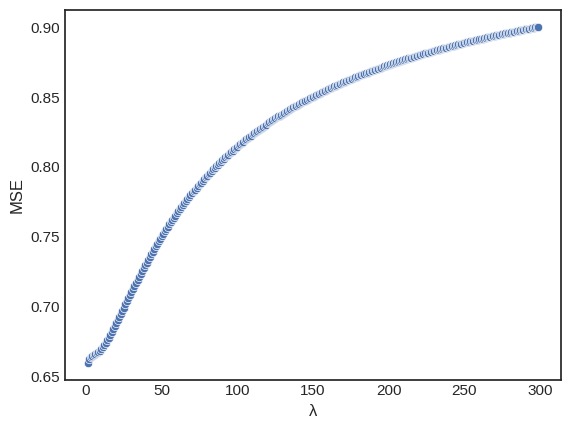

In [387]:
lambdas = np.arange(1, 300, 1)
MSEs    = [] 
for l in lambdas:
    MSEs += [np.mean(ridge_cv(X, y, λ=l, k=10))]

sns.scatterplot(x='λ', y='MSE', data=pd.DataFrame({'λ': lambdas, 'MSE': MSEs}));

En el gráfico anterior se muestra la dispersión a partir de cómo cambia el valor del error cuadrático medio (MSE) a medida que se varía el valor de lambda en una Ridge Regression.

In [388]:
min(zip(MSEs, lambdas))

(0.6598203086194234, 1)

Este resultado significa que el MSE mínimo es 0.6598203086194234 y se obtiene cuando el valor de lambda es 1. Al tener elvalor óptimo de lambda (1), lo usaremos para entrenar y evaluar el modelo de Ridge Regression.

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 [Text(-0.6000000000000001, 0, '−0.6'),
  Text(-0.4000000000000001, 0, '−0.4'),
  Text(-0.20000000000000007, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.19999999999999996, 0, '0.2'),
  Text(0.3999999999999999, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8')])

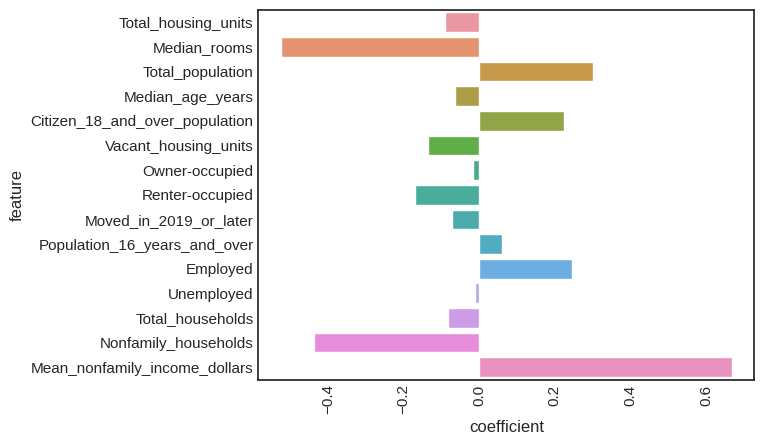

In [389]:
# What coefficients does ridge regression choose for the optimal lambda value?
model = linear_model.Ridge(alpha = 1, fit_intercept=False, solver='cholesky').fit(X, y)
df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
ax = sns.barplot(x='coefficient', y='feature', data=df);
plt.xticks(rotation=90)


In [390]:
model.coef_

array([-0.09081947, -0.52372555,  0.29998983, -0.06391921,  0.2246685 ,
       -0.13569967, -0.01491618, -0.16982928, -0.07195406,  0.05953532,
        0.2463769 , -0.00974876, -0.08174882, -0.43534937,  0.66838939])

El gráfico anterior es de gran utilidad para interpretar la importancia relativa de cada característica en la predicción de la variable dependiente. Evidenciamos que la variable "Employed" y " Nonfamily_householdss" presenta mayor contribución a la variable dependiente. Employed cuenta con un coeficiente de (0.7)aproximadamente lo que indica que a medida que aumenta esa variable, la variable de respuesta también tiende a aumentar, mientras que Nonfamily_householdss (-0.7)aproximadamente indica que a medida que aumenta esa variable, la variable dependiente tiende a disminuir.

##10) LASSO

In [391]:
def lasso_cv(X, y, λ, k):
    """Perform the lasso with 
    k-fold cross validation to return mean MSE scores for each fold"""
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)

        model = linear_model.Lasso(alpha=λ, copy_X=True, fit_intercept=False, max_iter=10000,
                                   positive=False, precompute=False, random_state=None,
                                   selection='cyclic', tol=0.0001, warm_start=False).fit(X_train, y_train)

        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs

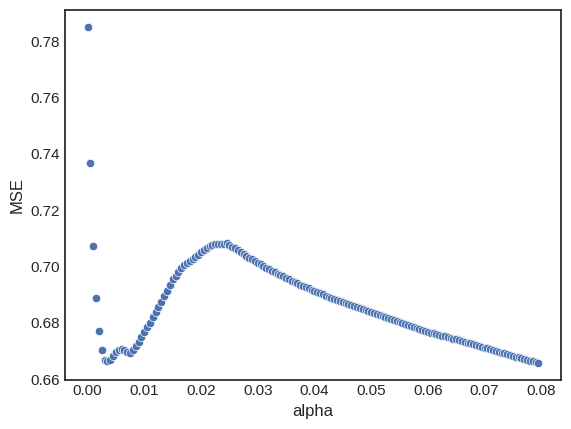

In [392]:
lambdas = np.arange(0, 0.08, 0.0005)
MSEs = [] 
for l in lambdas:
    MSEs += [np.mean(lasso_cv(X, y, λ=l, k=10))]

sns.scatterplot(x='alpha', y='MSE', data=pd.DataFrame({'alpha': lambdas, 'MSE': MSEs}));


La gráfica permite identificar los valores de lambda que minimizan el error cuadrático medio y por ende serían los mejores parámetros de regularización para el modelo.

In [393]:
min(zip(MSEs, lambdas))

(0.6658402308581015, 0.0795)

Se interpreta como el valor óptimo de lambda (0.0795) que minimiza el error cuadrático medio en la regresión Lasso.

(array([-0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(-0.4, 0, '−0.4'),
  Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.20000000000000007, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6, 0, '0.6')])

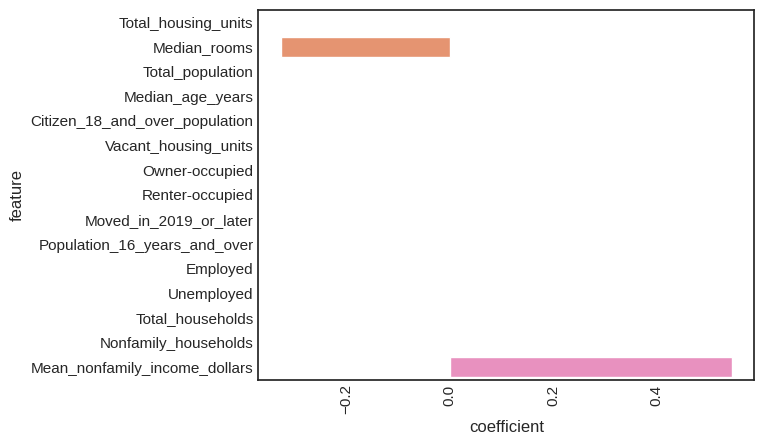

In [394]:
model = linear_model.Lasso(alpha=0.0795, copy_X=True, fit_intercept=False, max_iter=10000,
                           positive=False, precompute=False, random_state=None,
                           selection='cyclic', tol=0.0001, warm_start=False).fit(X, y)
df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
ax = sns.barplot(x='coefficient', y='feature', data=df);
plt.xticks(rotation=90)

Los coeficientes dados por el modelo de Lasso son 0.5 para "Mean Family income dollars", 0.2 para "Mean nonfamily income dollars" y -0.2 para "median rooms", significa que la variable correspondiente al primer coeficiente tiene una influencia positiva más fuerte en la variable dependiente, mientras que las variables correspondientes al segundo y tercer coeficientes tienen influencias positivas más débiles y negativas, respectivamente. Además, como el coeficiente del tercer predictor es negativo, esto indica que una mayor presencia de esa variable se correlaciona de forma menor con la variable dependiente.

##11) CLUSTERING


In [395]:
Z = data.drop(data[['Median_Price_dollars', 'Variable']], axis=1)
Z = scale(Z)

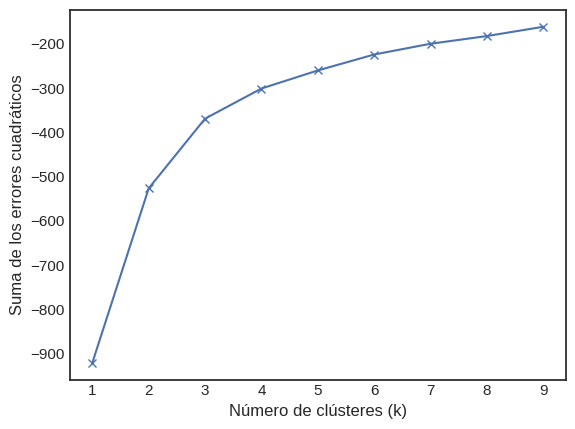

In [396]:
nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(Z).score(Z) for i in range(len(kmeans))]
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score, 'bx-')

 Con el código anterior ajustamos múltiples modelos k-means con diferentes números de clústeres y trazamos la suma de los errores cuadráticos en función del número de clústeres. 
 
 Esto nos ayudó a determinar el número óptimo de clústeres (2) para un conjunto de datos dado al observar el punto donde la suma de los errores cuadráticos deja de disminuir significativamente.

In [397]:
from scipy.spatial.distance import cdist

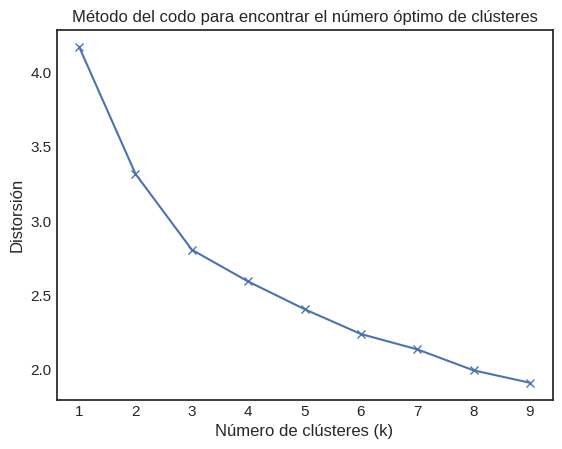

In [398]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Z)
    distortions.append(sum(np.min(cdist(Z, kmeans.cluster_centers_, 'euclidean'), axis=1)) / Z.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Distorsión')
plt.title('Método del codo para encontrar el número óptimo de clústeres')
plt.show()

Este otro código calcula la distorsión para diferentes valores de número de clústeres en el algoritmo k-means y grafica la curva de distorsión. 

Su objetivo es identificar el "codo" en la curva, es decir, el punto donde el descenso de la distorsión se ralentiza significativamente. 

Con ambos metodos, nos damos cuenta que a partir de los 2 clusters la pendiente tiende a cambiar, por eso es el valor elegido para analizar.

In [399]:
kmeans = KMeans(n_clusters = 2).fit(Z)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.38634346  0.1372207  -0.38852407  0.12273268 -0.39374073 -0.30811783
  -0.38339949 -0.38266632 -0.39752673 -0.3915943  -0.38384298 -0.38819467
  -0.38408359 -0.39048675 -0.01742805 -0.05702437 -0.01895789 -0.05688461
  -0.01553209 -0.40224463 -0.06125285 -0.09394477 -0.08897377]
 [ 1.8765254  -0.66650054  1.88711692 -0.59613015  1.91245499  1.49657229
   1.86222612  1.85866499  1.9308441   1.90202947  1.86438018  1.88551698
   1.86554885  1.89664995  0.08465052  0.27697551  0.09208117  0.27629669
   0.07544157  1.95375964  0.29751384  0.45630319  0.43215832]]


Aplicamos el algoritmo k-means con k = 2 al conjunto de datos Z y muestra los centroides resultantes. 

Estos representan los puntos centrales de los dos clústeres encontrados por el algoritmo.

In [400]:
labels = kmeans.predict(Z)
data['label'] = labels

In [401]:
data.head(10)

,Variable,Total_housing_units,Median_rooms,Median_Price_dollars,Total_population,Median_age_years,Citizen_18_and_over_population,Vacant_housing_units,Owner-occupied,Renter-occupied,...,Median_household_income_dollars,Mean_household_income_dollars,Median_family_income_dollars,Mean_family_income_dollars,Per_capita_income_dollars,Nonfamily_households,Median_nonfamily_income_dollars,Mean_nonfamily_income_dollars,Median_earnings_for_workers_dollars,label
0,Alachua,125518,5.3,245300,279238,32.8,216625,17329,61131,47058,...,56445,86187,86547,116736,35001,51054,33100,50263,31278,0
1,Bay,106144,4.9,243200,179168,41.1,135381,26612,50383,29149,...,60557,78433,70172,88914,33654,26896,46693,53791,35833,0
2,Brevard,294237,5.6,269500,616628,47.0,486055,39923,195481,58833,...,65333,89370,79906,107670,38066,93653,39129,52860,36656,0
3,Broward,864468,4.6,346100,1930983,41.3,1297147,116753,473136,274579,...,65747,92881,78917,109044,36754,274786,42046,60635,37453,1
4,Charlotte,113469,5.1,267900,194843,60.4,163761,24481,73636,15352,...,59285,76367,68895,87895,35270,30330,35517,49812,31339,0
5,Citrus,82837,5.5,206400,158083,57.8,134005,14568,57340,10929,...,47197,65618,62890,77830,29621,27052,33827,45519,31554,0
6,Clay,86753,6.3,265800,222361,40.9,167404,6294,60907,19552,...,76679,89972,85196,101142,33364,21698,49690,54703,40362,0
7,Collier,233635,4.8,416200,38598,52.7,28298,69692,119565,44378,...,74215,123892,89814,139429,52622,52152,49010,85497,33942,0
8,Columbia,30028,5.1,173800,70385,39.8,54149,2483,19617,7928,...,54077,73383,70523,89354,28104,9223,36880,38160,35619,0
9,Duval,444930,5.6,246900,999935,36.8,732818,38629,239816,166485,...,59980,83404,74128,98371,34561,161307,41776,57103,36877,1


Creamos una nueva columna en el 'DataFrame' con la clasificación de las variables con su respectiva agrupación.

Como son 2 clusters, estarían clasificados en '0' y '1'.

In [402]:
cl1 = Z['Median_rooms']

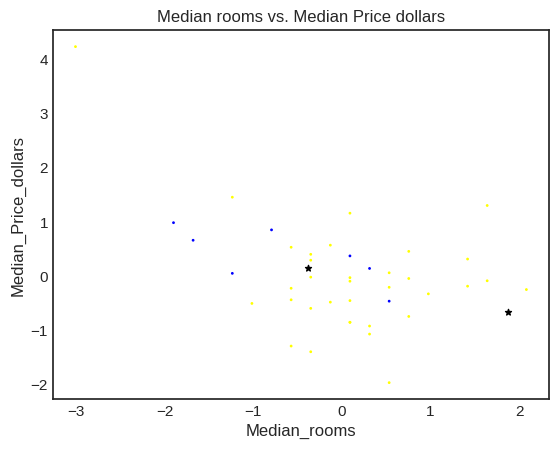

In [403]:
colores=['yellow','blue','green','red','purple']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(cl1, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Median_rooms')
plt.ylabel('Median_Price_dollars')
plt.title('Median rooms vs. Median Price dollars')
plt.show()

Mediante esta gráfica de dispersión de los puntos en el conjunto de datos, se le ve asignado colores según su etiqueta de clúster. 
También muestra los centroides de los clústeres como asteriscos negros en el gráfico, representando la relación entre las variables "Median_rooms" (habitaciones medianas) en el eje x y "Median_Price_dollars" (precio medio en dólares) en el eje y.

In [404]:
cl2 = Z['Median_age_years']

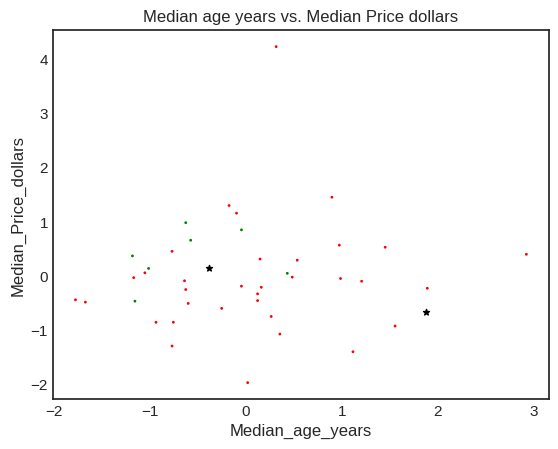

In [405]:
colors = ['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colors [row])
plt.scatter(cl2, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Median_age_years')
plt.ylabel('Median_Price_dollars')
plt.title('Median age years vs. Median Price dollars')
plt.show()

Nuevamente se realiza el gráfico pero relacionando las variables "Median_age_years" y "Median_Price_dollars".

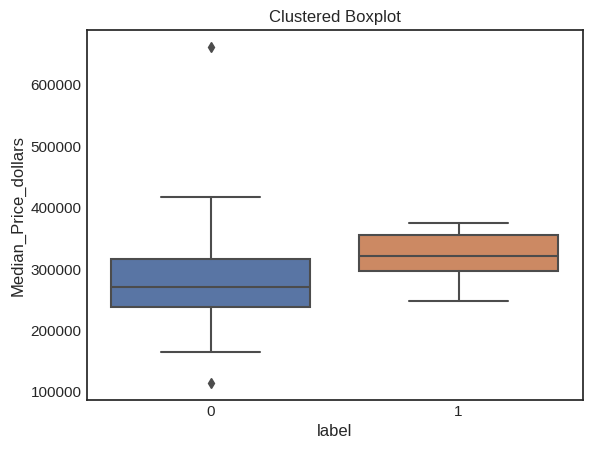

In [406]:
sns.boxplot(data = data, x = 'label', y = 'Median_Price_dollars')
plt.title('Clustered Boxplot')
plt.show()

Observamos un diagrama de caja que muestra la distribución de los valores de "Median_Price_dollars" para cada clúster en el conjunto de datos. El eje x muestra las etiquetas de clúster y el eje y muestra los valores de "Median_Price_dollars".

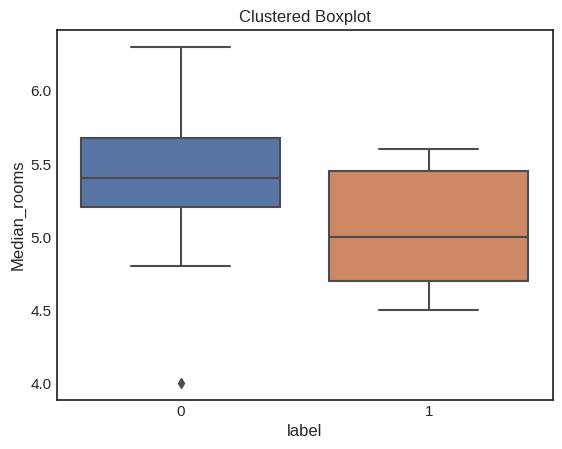

In [407]:
sns.boxplot(data = data, x = 'label', y = 'Median_rooms')
plt.title('Clustered Boxplot')
plt.show()

 El eje x muestra las etiquetas de clúster y el eje y muestra los valores de "Median_rooms".

##12) DEBUGGING MODEL

A continuación con el objetivo de mejorar la predicción y resultado de los modelos, escogemos como variables para el analisis de la variable "Median Price Dollars", las siguientes: "Median_rooms", "Employed", "Mean_family_income_dollars", "Nonfamily_households", "Mean_nonfamily_income_dollars. Debido que notamos un aumento considerable en la precisión y en el mejoramiento de la mayoría de modelos; su análisis vendría siendo el mismo realizado anteriormente, con la diferencia que los valores vienen siendo mejor y mucho más precisos en esta etapa del trabajo.

In [408]:
#DESCRIPCIÓN DEL MODELO
datos2 = data[["Median_Price_dollars", "Median_rooms", "Employed", "Mean_family_income_dollars", "Nonfamily_households", "Mean_nonfamily_income_dollars"]]
datos2.head(5)

,Median_Price_dollars,Median_rooms,Employed,Mean_family_income_dollars,Nonfamily_households,Mean_nonfamily_income_dollars
0,245300,5.3,135267,116736,51054,50263
1,243200,4.9,87139,88914,26896,53791
2,269500,5.6,275761,107670,93653,52860
3,346100,4.6,973995,109044,274786,60635
4,267900,5.1,69375,87895,30330,49812


In [409]:
desc = datos2.describe()
desc

,Median_Price_dollars,Median_rooms,Employed,Mean_family_income_dollars,Nonfamily_households,Mean_nonfamily_income_dollars
count,41.000000,41.000000,4.100000e+01,41.000000,41.000000,41.000000
mean,288487.804878,5.358537,2.378170e+05,103109.365854,72743.243902,56197.853659
std,88037.614674,0.452203,2.777571e+05,20449.259308,75700.954902,11145.479340
min,114200.000000,4.000000,2.170700e+04,58049.000000,9223.000000,32825.000000
25%,245300.000000,5.100000,6.637800e+04,88706.000000,26337.000000,49572.000000
50%,280100.000000,5.400000,1.488050e+05,101476.000000,47233.000000,55691.000000
75%,323200.000000,5.600000,2.589890e+05,111266.000000,89188.000000,62605.000000
max,661400.000000,6.300000,1.297349e+06,148146.000000,311368.000000,86489.000000


In [410]:
y = datos2["Median_Price_dollars"]
X = datos2.drop(datos2[['Median_Price_dollars']], axis=1)
y = scale(y)
X = scale(X)

In [411]:
#ANÁLISIS REGRESIÓN MULTIPLE
form2 = "Median_Price_dollars ~ Median_rooms + Employed + Mean_family_income_dollars + Nonfamily_households + Mean_nonfamily_income_dollars"
results = smf.ols(form ,data).fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Median_Price_dollars   R-squared:                       0.852
Model:                              OLS   Adj. R-squared:                  0.815
Method:                   Least Squares   F-statistic:                     23.01
Date:                  Wed, 31 May 2023   Prob (F-statistic):           3.30e-11
Time:                          04:59:21   Log-Likelihood:                -485.32
No. Observations:                    41   AIC:                             988.6
Df Residuals:                        32   BIC:                             1004.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [412]:
#DECISIONTREE
def trees_cv(X, y, λ, k):
    """Perform the Regressor Decision Tree with 
    k-fold cross validation to return mean MSE scores for each fold"""
    # Split dataset into k-folds
    # Note: np.array_split doesn't raise excpetion is folds are unequal in size
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        # Fit model
        model =  DecisionTreeRegressor(random_state = 0, max_depth=λ).fit(X_train, y_train)
        
        # Measure MSE
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs

In [413]:
def mse(y_hat, y):
    """Calculate Mean Squared Error"""
    return np.sum(np.square(y_hat - y)) / y.size

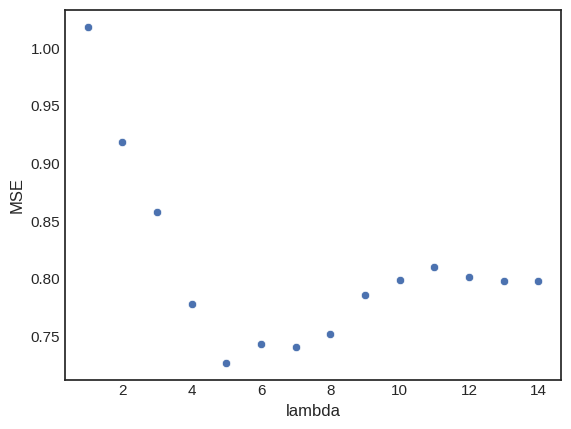

In [414]:
lambdas = np.arange(1, 15, 1)
MSEs = [] 
for l in lambdas:
    MSEs += [np.mean(trees_cv(X, y, λ=l, k=10))]

sns.scatterplot(x='lambda', y='MSE', data=pd.DataFrame({'lambda': lambdas, 'MSE': MSEs}));

In [415]:
min(zip(MSEs, lambdas))

(0.7272972720933676, 5)

In [416]:
# Fit Sklearns tree classifier
forecast = DecisionTreeRegressor(random_state = 0, max_depth=5).fit(X, y)

In [417]:
forecast.score(X, y)

0.9693400612657811

In [418]:
#XG BOOST
def trees_cvBoost(X, y, λ, k):
    """Perform the Regressor Decision Tree with 
    k-fold cross validation to return mean MSE scores for each fold"""
    # Split dataset into k-folds
    # Note: np.array_split doesn't raise excpetion is folds are unequal in size
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        # Fit model
        xgb_model = XGBRegressor(random_state=0, max_depth= λ).fit(X_train, y_train)
        
        # Measure MSE
        y_hat = xgb_model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs

In [419]:
def mse(y_hat, y):
    """Calculate Mean Squared Error"""
    return np.sum(np.square(y_hat - y)) / y.size

In [ ]:
lambdas = np.arange(1, 15, 1)
MSEs = [] 
for l in lambdas:
    MSEs += [np.mean(trees_cvBoost(X, y, λ=l, k=10))]

sns.scatterplot(x='lambda', y='MSE', data=pd.DataFrame({'lambda': lambdas, 'MSE': MSEs}));

In [ ]:
min(zip(MSEs, lambdas))

In [ ]:
# Fit Sklearns tree classifier
forecastXG = XGBRegressor(random_state=0, max_depth = 2).fit(X, y)

In [ ]:
forecastXG.score(X, y)

In [ ]:
#RANDOMFOREST
def RF_cv(X, y, λ, k):
    """Perform the RF with 
    k-fold cross validation to return mean MSE scores for each fold"""
    # Split dataset into k-folds
    # Note: np.array_split doesn't raise excpetion is folds are unequal in size
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        # Fit model
        model = RandomForestRegressor(n_estimators = 10, max_depth = λ).fit(X_train, y_train)
        
        # Measure MSE
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs

In [ ]:
lambdas = np.arange(1, 15, 1)
MSEs = [] 
for l in lambdas:
    MSEs += [np.mean(RF_cv(X, y, λ=l, k=10))]

sns.scatterplot(x='lambda', y='MSE', data=pd.DataFrame({'lambda': lambdas, 'MSE': MSEs}));

In [ ]:
min(zip(MSEs, lambdas))

In [ ]:
forecastR = RandomForestRegressor(random_state = 0, max_depth=13).fit(X, y)

In [ ]:
forecastR.score(X, y)

In [ ]:
#RIDGE
def ridge_cv(X, y, λ, k):
    """Perform ridge regresion with 
    k-fold cross validation to return mean MSE scores for each fold"""
    # Split dataset into k-folds
    # Note: np.array_split doesn't raise excpetion is folds are unequal in size
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        # Fit model
        model = linear_model.Ridge(alpha=λ, fit_intercept=False, solver='cholesky').fit(X_train, y_train)
        
        # Measure MSE
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs


In [ ]:
def mse(y_hat, y):
    """Calculate Mean Squared Error"""
    return np.sum(np.square(y_hat - y)) / y.size

In [ ]:
lambdas = np.arange(1, 300, 1)
MSEs    = [] 
for l in lambdas:
    MSEs += [np.mean(ridge_cv(X, y, λ=l, k=10))]

sns.scatterplot(x='λ', y='MSE', data=pd.DataFrame({'λ': lambdas, 'MSE': MSEs}));

In [ ]:
min(zip(MSEs, lambdas))

In [ ]:
# What coefficients does ridge regression choose for the optimal lambda value?
model = linear_model.Ridge(alpha = 1, fit_intercept=False, solver='cholesky').fit(X, y)
df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
ax = sns.barplot(x='coefficient', y='feature', data=df);
plt.xticks(rotation=90)


In [ ]:
model.coef_

In [ ]:
#LASSO
def lasso_cv(X, y, λ, k):
    """Perform the lasso with 
    k-fold cross validation to return mean MSE scores for each fold"""
    # Split dataset into k-folds
    # Note: np.array_split doesn't raise excpetion is folds are unequal in size
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    MSEs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = X.drop(X_folds[f].index)
        y_train = y.drop(y_folds[f].index)
        
        # Fit model
        model = linear_model.Lasso(alpha=λ, copy_X=True, fit_intercept=False, max_iter=10000,
                                   positive=False, precompute=False, random_state=None,
                                   selection='cyclic', tol=0.0001, warm_start=False).fit(X_train, y_train)
        
        # Measure MSE
        y_hat = model.predict(X_test)
        MSEs += [mse(y_hat, y_test)]
    return MSEs

In [ ]:
lambdas = np.arange(0, 0.08, 0.0005)
MSEs = [] 
for l in lambdas:
    MSEs += [np.mean(lasso_cv(X, y, λ=l, k=10))]

sns.scatterplot(x='alpha', y='MSE', data=pd.DataFrame({'alpha': lambdas, 'MSE': MSEs}));


In [ ]:
min(zip(MSEs, lambdas))

In [ ]:
# What coefficients does the lasso choose for the optimal lambda value?
model = linear_model.Lasso(alpha=0.0, copy_X=True, fit_intercept=False, max_iter=10000,
                           positive=False, precompute=False, random_state=None,
                           selection='cyclic', tol=0.0001, warm_start=False).fit(X, y)
df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
ax = sns.barplot(x='coefficient', y='feature', data=df);
plt.xticks(rotation=90)